# TELESCOPIO ESPACIAL JAMES WEBB
PLANTEAMIENTO DEL SISTEMA DE ECUACIONES PARA EL TELESCOPIO

- Concición de perperdicularidad
- Ubicacion de los pistones

<p align="center">
<img src="Imagenes/Telescopio_espacial.png" alt="image" width="600"/>
</p>

DESCRIPCION DEL MODELO:
- El centro de la base 'B' esta dada por el punto *B($x_{0}$,$y_{0}$)* que por defecto se encuentra en *P(0,0)*
- El centro del espejo secundario 'L' esta dada por el punto *L($x_{2}$,$y_{2}$)* que por defecto se encuentra en (0,7.5)
- El punto *P($x_{1}$,$y_{1}$)* representa el objetivo al que el espejo debe orientarse

### CONDICIÓN DE PERPERDICULARIDAD
Para asegurar que el espejo secundario esté orientado de forma que su superficie sea perpendicular a la dirección hacia el punto *P($x_{1}$,$y_{1}$)*, consideremos la siguiente geometría y planteamiento:
- **Punto medio del espejo secundario:**  Llamaremos *L($x_{2}$,$y_{2}$)* al punto medio del espejo, ubicado en una posición específica en el plano cartesiano.
- **Vector hacia el punto objetivo, $\vec{P}$:** Definimos el vector que va desde el punto medio del espejo *L($x_{2}$,$y_{2}$)* hacia el punto *P($x_{1}$,$y_{1}$)* como: <br>
  $\vec{P}$=($x_{1}$-$x_{2}$ , $y_{1}$-$y_{2}$)
- **Vector normal del espjo, $\vec{L}$:** Para cumplir con la condición de perpendicularidad, necesitamos un vector normal al espejo secundario. Definimos este vector normal $\vec{L}$ como: <br>
  $\vec{L}$=(-($y_{1}$-$y_{2}$),$x_{1}$-$x_{2}$) <br>
  De tal manera que si realizamos un producto punto entre $\vec{P}$ y $\vec{L}$ este de cero.


Vector P: [2 2]
Vector L: [-2  2]
Producto punto (P . L): 0
El espejo está correctamente orientado hacia el punto P, es perpendicular.


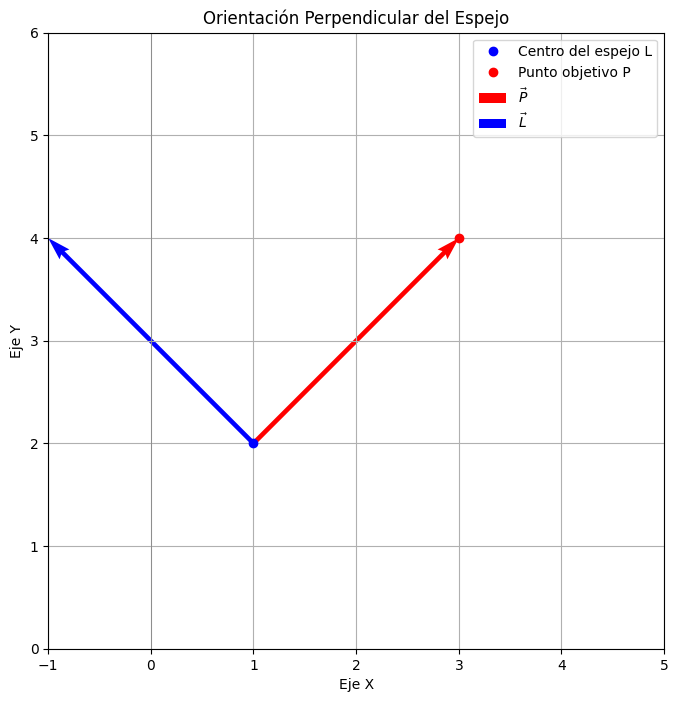

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def verificar_perpendicularidad_grafica(x1, y1, x2, y2):
    # Definir el vector P desde L(x2, y2) hasta P(x1, y1)
    vector_P = np.array([x1 - x2, y1 - y2])
    
    # Definir el vector normal L, que es perpendicular a P
    vector_L = np.array([-(y1 - y2), x1 - x2])
    
    # Calcular el producto punto
    producto_punto = np.dot(vector_P, vector_L)
    
    # Verificar la condición de perpendicularidad
    es_perpendicular = np.isclose(producto_punto, 0)
    
    # Mostrar resultados
    print("Vector P:", vector_P)
    print("Vector L:", vector_L)
    print("Producto punto (P . L):", producto_punto)
    
    if es_perpendicular:
        print("El espejo está correctamente orientado hacia el punto P, es perpendicular.")
    else:
        print("El espejo NO está correctamente orientado hacia el punto P, no es perpendicular.")
    
    # Graficar
    plt.figure(figsize=(8, 8))
    plt.axhline(0, color='grey',linewidth=0.5)
    plt.axvline(0, color='grey',linewidth=0.5)

    # Punto L
    plt.plot(x2, y2, 'bo', label="Centro del espejo L")
    # Punto P
    plt.plot(x1, y1, 'ro', label="Punto objetivo P")

    # Dibujar vector P (desde L hacia P)
    plt.quiver(x2, y2, vector_P[0], vector_P[1], angles='xy', scale_units='xy', scale=1, color='r', label=r"$\vec{P}$")
    
    # Dibujar vector L (vector normal al espejo)
    plt.quiver(x2, y2, vector_L[0], vector_L[1], angles='xy', scale_units='xy', scale=1, color='b', label=r"$\vec{L}$")
    
    # Configuración de la gráfica
    plt.xlim(min(x1, x2) - 2, max(x1, x2) + 2)
    plt.ylim(min(y1, y2) - 2, max(y1, y2) + 2)
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Orientación Perpendicular del Espejo")
    plt.legend()
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Ejemplo de uso con coordenadas de L y P
x1, y1 = 3, 4   # Coordenadas del punto P
x2, y2 = 1, 2   # Coordenadas del punto medio del espejo L

verificar_perpendicularidad_grafica(x1, y1, x2, y2)


### UBICACION DE LOS PISTONES
Una vez terminada la condicion de perpendicularidad, se tratara con la parte restante del telescopio. Es decir: Los pistones y la base. Por lo cual tenemos lo siguiente:
- **Base del telescopio, *B*:**
    - Este tiene una longitud *A*
    - El punto medio de la base esta dada por *B(0,0)*
    - El punto de anclaje izquierdo para el pistón 1 en la base esta dada por PA1(-(A/2), 0)
    - El punto de anclaje derecho para el pistón 2 en la base esta dada por PA2((A/2), 0)
- **Pistones, *PS*:**
    - Cada piston tiene la misma longitud *B*
    - Cada piston tiene la posibilidad de contraerse *B/2*
- **Espejo secundario, *L*:**
    - Este tiene una longitud *C*
    - El punto medio del espejo secundario esta dada por *L($x_{2}$,$y_{2}$)*
    - El punto de anclaje izquierdo para el pistón 1 en el espejo secundario esta dada por PA3-(C/2), $y_{2}$)
    - El punto de anclaje izquierdo para el pistón 2 en el espejo secundario esta dada por PA4(C/2), $y_{2}$)


La longitud del pistón 1 (4.12) no está en el rango permitido [5.0, 10]
La longitud del pistón 2 (4.12) no está en el rango permitido [5.0, 10]


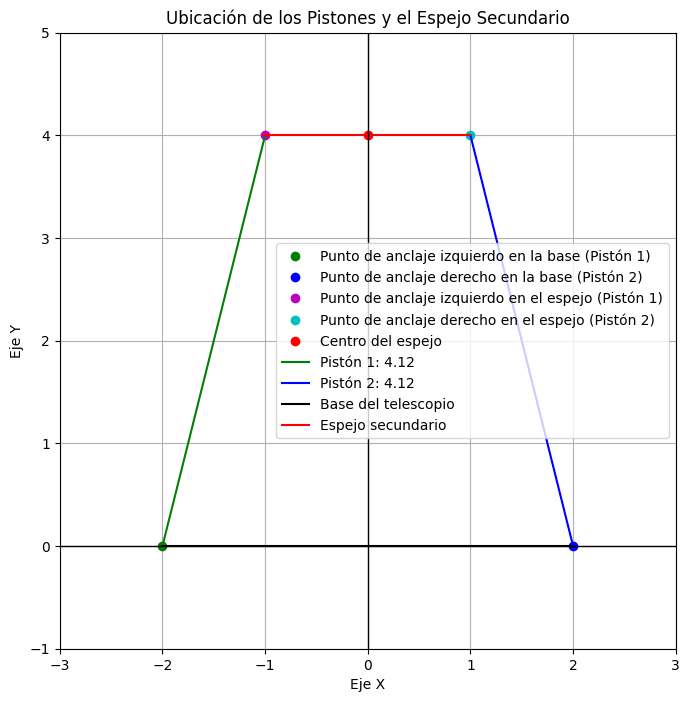

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular las longitudes de los pistones
def calcular_longitudes_pistones(A, B, C, x2, y2):
    # Coordenadas de los puntos de anclaje en la base y en el espejo
    PA1_base = np.array([-A/2, 0])         # Punto de anclaje izquierdo en la base (Pistón 1)
    PA2_base = np.array([A/2, 0])          # Punto de anclaje derecho en la base (Pistón 2)
    PA3_espejo = np.array([x2 - C/2, y2])  # Punto de anclaje izquierdo en el espejo (Pistón 1)
    PA4_espejo = np.array([x2 + C/2, y2])  # Punto de anclaje derecho en el espejo (Pistón 2)
    
    # Longitud del pistón 1
    piston1 = np.linalg.norm(PA3_espejo - PA1_base)
    # Longitud del pistón 2
    piston2 = np.linalg.norm(PA4_espejo - PA2_base)
    
    # Verificar si las longitudes están dentro del rango permitido [B/2, B]
    if piston1 < B/2 or piston1 > B:
        print(f"La longitud del pistón 1 ({piston1:.2f}) no está en el rango permitido [{B/2}, {B}]")
    else:
        print(f"La longitud del pistón 1 es válida: {piston1:.2f}")
        
    if piston2 < B/2 or piston2 > B:
        print(f"La longitud del pistón 2 ({piston2:.2f}) no está en el rango permitido [{B/2}, {B}]")
    else:
        print(f"La longitud del pistón 2 es válida: {piston2:.2f}")
    
    return piston1, piston2, PA1_base, PA2_base, PA3_espejo, PA4_espejo

# Función para graficar la base, el espejo y los pistones
def graficar_pistones(A, B, C, x2, y2):
    piston1, piston2, PA1_base, PA2_base, PA3_espejo, PA4_espejo = calcular_longitudes_pistones(A, B, C, x2, y2)
    
    # Crear la figura
    plt.figure(figsize=(10, 8))
    
    # Graficar puntos de anclaje en la base y en el espejo
    plt.plot(PA1_base[0], PA1_base[1], 'go', label="Punto de anclaje izquierdo en la base (Pistón 1)")
    plt.plot(PA2_base[0], PA2_base[1], 'bo', label="Punto de anclaje derecho en la base (Pistón 2)")
    plt.plot(PA3_espejo[0], PA3_espejo[1], 'mo', label="Punto de anclaje izquierdo en el espejo (Pistón 1)")
    plt.plot(PA4_espejo[0], PA4_espejo[1], 'co', label="Punto de anclaje derecho en el espejo (Pistón 2)")
    plt.plot(x2, y2, 'ro', label="Centro del espejo")

    # Dibujar los pistones (líneas entre puntos de anclaje en base y espejo)
    plt.plot([PA1_base[0], PA3_espejo[0]], [PA1_base[1], PA3_espejo[1]], 'g-', label=f"Pistón 1: {piston1:.2f}")
    plt.plot([PA2_base[0], PA4_espejo[0]], [PA2_base[1], PA4_espejo[1]], 'b-', label=f"Pistón 2: {piston2:.2f}")
    
    # Dibujar la base y el espejo
    plt.plot([-A/2, A/2], [0, 0], 'k-', label="Base del telescopio")
    plt.plot([x2 - C/2, x2 + C/2], [y2, y2], 'r-', label="Espejo secundario")
    
    # Configuración de la gráfica
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.xlim(min(PA1_base[0], PA2_base[0], PA3_espejo[0], PA4_espejo[0]) - 1, max(PA1_base[0], PA2_base[0], PA3_espejo[0], PA4_espejo[0]) + 1)
    plt.ylim(min(0, y2) - 1, max(0, y2) + 1)
    
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Ubicación de los Pistones y el Espejo Secundario")
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Ejemplo de uso con parámetros definidos
A = 4         # Longitud de la base
B = 10         # Longitud máxima de los pistones
C = 2         # Longitud del espejo secundario
x2, y2 = 0,4 # Coordenadas del centro del espejo

graficar_pistones(A, B, C, x2, y2)


# UNION DE LOS DOS
ASD

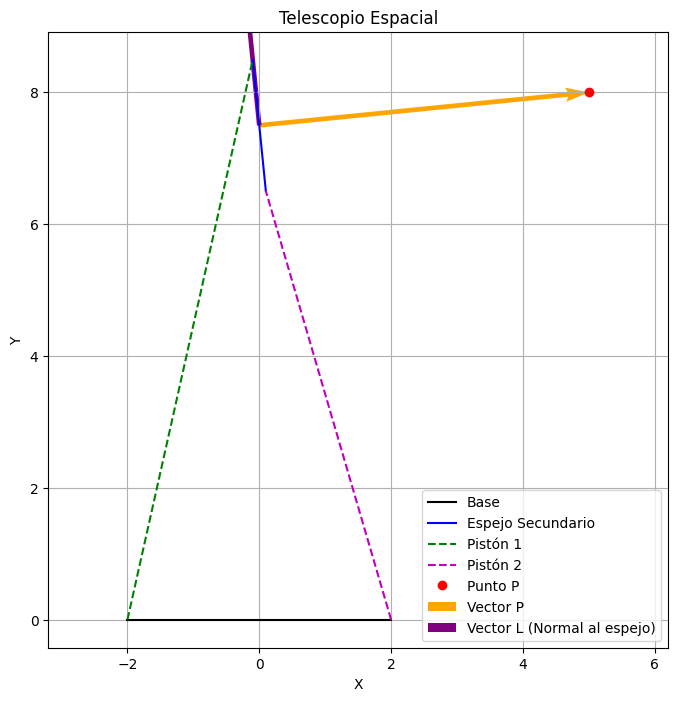

El angulo del vector P: 5.710593137499642
Medida del piston 1:  8.705029751647368 
Medida del piston 2:  6.77690395909269


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# DATOS DE ENTRADA
A = 4               # Longitud de la base
B = 5               # Longitud máxima de los pistones 
C = 2               # Longitud del espejo secundario
x2, y2 = 0, 7.5     # Coordenadas del centro del espejo
x1, y1 = 5, 8       # Coordenadas del punto P

# Puntos de anclaje en la base y espejo para los pistones
base_center = (0, 0)
piston1_base = (-A / 2, 0)
piston2_base = (A / 2, 0)

# Vector P y Vector L
vector_P = np.array([x1 - x2, y1 - y2])
vector_L = np.array([-(y1 - y2), x1 - x2])

# Calcular el ángulo de vector_P con respecto al eje X (en grados)
angle_P = np.degrees(np.arctan2(vector_P[1], vector_P[0]))

# Verificar si el ángulo está dentro del rango [0, 180]
if angle_P < 0 or angle_P > 180:
    print(f"Ángulo {angle_P:.2f}° fuera del rango permitido (0 a 180 grados). No se graficará.")
else:
    # Normalizar el vector L para usarlo en la dirección del espejo secundario
    vector_L_normalizado = vector_L / np.linalg.norm(vector_L)

    # Calcular los puntos de anclaje en el espejo a lo largo del vector L
    piston2_mirror = (x2 - (C / 2) * vector_L_normalizado[0], y2 - (C / 2) * vector_L_normalizado[1])
    piston1_mirror = (x2 + (C / 2) * vector_L_normalizado[0], y2 + (C / 2) * vector_L_normalizado[1])

    # Longitudes de los pistones
    length_piston1 = np.sqrt((piston1_mirror[0] - piston1_base[0])**2 + (piston1_mirror[1] - piston1_base[1])**2)
    length_piston2 = np.sqrt((piston2_mirror[0] - piston2_base[0])**2 + (piston2_mirror[1] - piston2_base[1])**2)

    # Graficar la base, el espejo, los pistones y el punto P
    plt.figure(figsize=(8, 8))
    plt.plot([piston1_base[0], piston2_base[0]], [piston1_base[1], piston2_base[1]], 'k-', label='Base')
    plt.plot([piston1_mirror[0], piston2_mirror[0]], [piston1_mirror[1], piston2_mirror[1]], 'b-', label='Espejo Secundario')

    # Graficar los pistones
    plt.plot([piston1_base[0], piston1_mirror[0]], [piston1_base[1], piston1_mirror[1]], 'g--', label='Pistón 1')
    plt.plot([piston2_base[0], piston2_mirror[0]], [piston2_base[1], piston2_mirror[1]], 'm--', label='Pistón 2')

    # Graficar el punto P
    plt.plot(x1, y1, 'ro', label='Punto P')

    # Vector P y Vector L desde el espejo
    plt.quiver(x2, y2, vector_P[0], vector_P[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Vector P')
    plt.quiver(x2, y2, vector_L[0], vector_L[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Vector L (Normal al espejo)')

    # Configuración de la gráfica
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Telescopio Espacial')
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.show()

    print("El angulo del vector P:", angle_P)
    print("Medida del piston 1: ",length_piston1, "\nMedida del piston 2: ",length_piston2)
